In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings 
warnings.filterwarnings("ignore")


In [7]:
# Train data already merged with train_labels.csv
train = pd.read_parquet("../data/processed/train_withlabels.parquet")

In [ ]:
test = pd.read_parquet("../data/raw/test.parquet")

In [8]:
len(train.columns)

191

In [9]:
train = train.groupby("customer_ID").tail(1).set_index("customer_ID")

In [10]:
cat_cols = [
    "B_30",
    "B_38",
    "D_114",
    "D_116",
    "D_117",
    "D_120",
    "D_126",
    "D_63",
    "D_64",
    "D_66",
    "D_68","target"
]

In [11]:
train["S_2"] = pd.to_datetime(train["S_2"])

In [17]:
len(train.columns)

190

In [18]:
len(train)

458913

In [19]:
train.head(3)

S_2       P_2  D_39  \
customer_ID                                                                     
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb... 2018-03-13  0.934745     0   
00000fd6641609c6ece5454664794f0340ad84dddce9a26... 2018-03-25  0.880519     6   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80... 2018-03-12  0.880875     0   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009382  1.007647   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.034684  1.004028   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004284  0.812649   

                                                         R_1       S_3  D_41  \
customer_ID                                                                    
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006104  0.135021   0.0   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006911  0.165509   0.0   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006450       NaN   0.0   

                                                         B_3  D_42  ...  \
customer_ID                                                         ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.007174   NaN  ...   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.005068   NaN  ...   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.007196   NaN  ...   

                                                    D_137  D_138  D_139  \
customer_ID                                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...     -1     -1      0   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...     -1     -1      0   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...     -1     -1      0   

                                                    D_140  D_141  D_142  \
customer_ID                                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...      0    0.0    NaN   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...      0    0.0    NaN   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...      0    0.0    NaN   

                                                    D_143     D_144  D_145  \
customer_ID                                                                  
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...      0  0.002970      0   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...      0  0.003169      0   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...      0  0.000834      0   

                                                    target  
customer_ID                                                 
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...       0  
00000fd6641609c6ece5454664794f0340ad84dddce9a26...       0  
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...       0  

[3 rows x 190 columns]

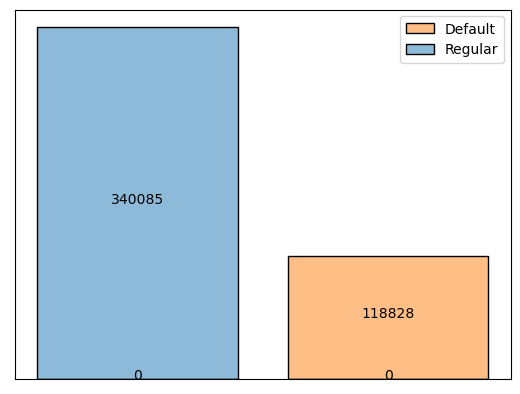

In [26]:
fig, ax = plt.subplots()
# target=train.target.value_counts(normalize=True)
# target.rename(index={0: "Regular", 1: "Default"}, inplace=True)
ax = sns.histplot(
    data=train,
    x=train.target.replace({0: "Regular", 1: "Default"}),
    discrete=True,
    shrink=0.8,
    hue="target",
    bins="target",
)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.legend(["Default", "Regular"])

for p in ax.patches:
    height = p.get_height()  

    ax.text(
        x=p.get_x()
        + (
            p.get_width() / 2
        ),  
        y=height / 2,  
        s="{:.0f}".format(height), 
        ha="center",
    ) 

In [23]:
list_nulls = train[train.columns[train.isna().any()]]
list_nulls = list_nulls.columns.to_list()
df_nan = train[list_nulls]

In [24]:
plot_nan = df_nan.isna().sum()

In [26]:
list_nans = []

for i, v in enumerate(plot_nan):
    list_nans.append(v)

In [27]:
df_plot = pd.DataFrame({"features": list_nulls, "nan_sum": list_nans})
df_plot.sort_values(by="nan_sum", ascending=False, inplace=True)
df_plot["%_total"] = round((df_plot["nan_sum"] / len(train)) * 100, 3)

Text(0, 0.5, '% Nan')

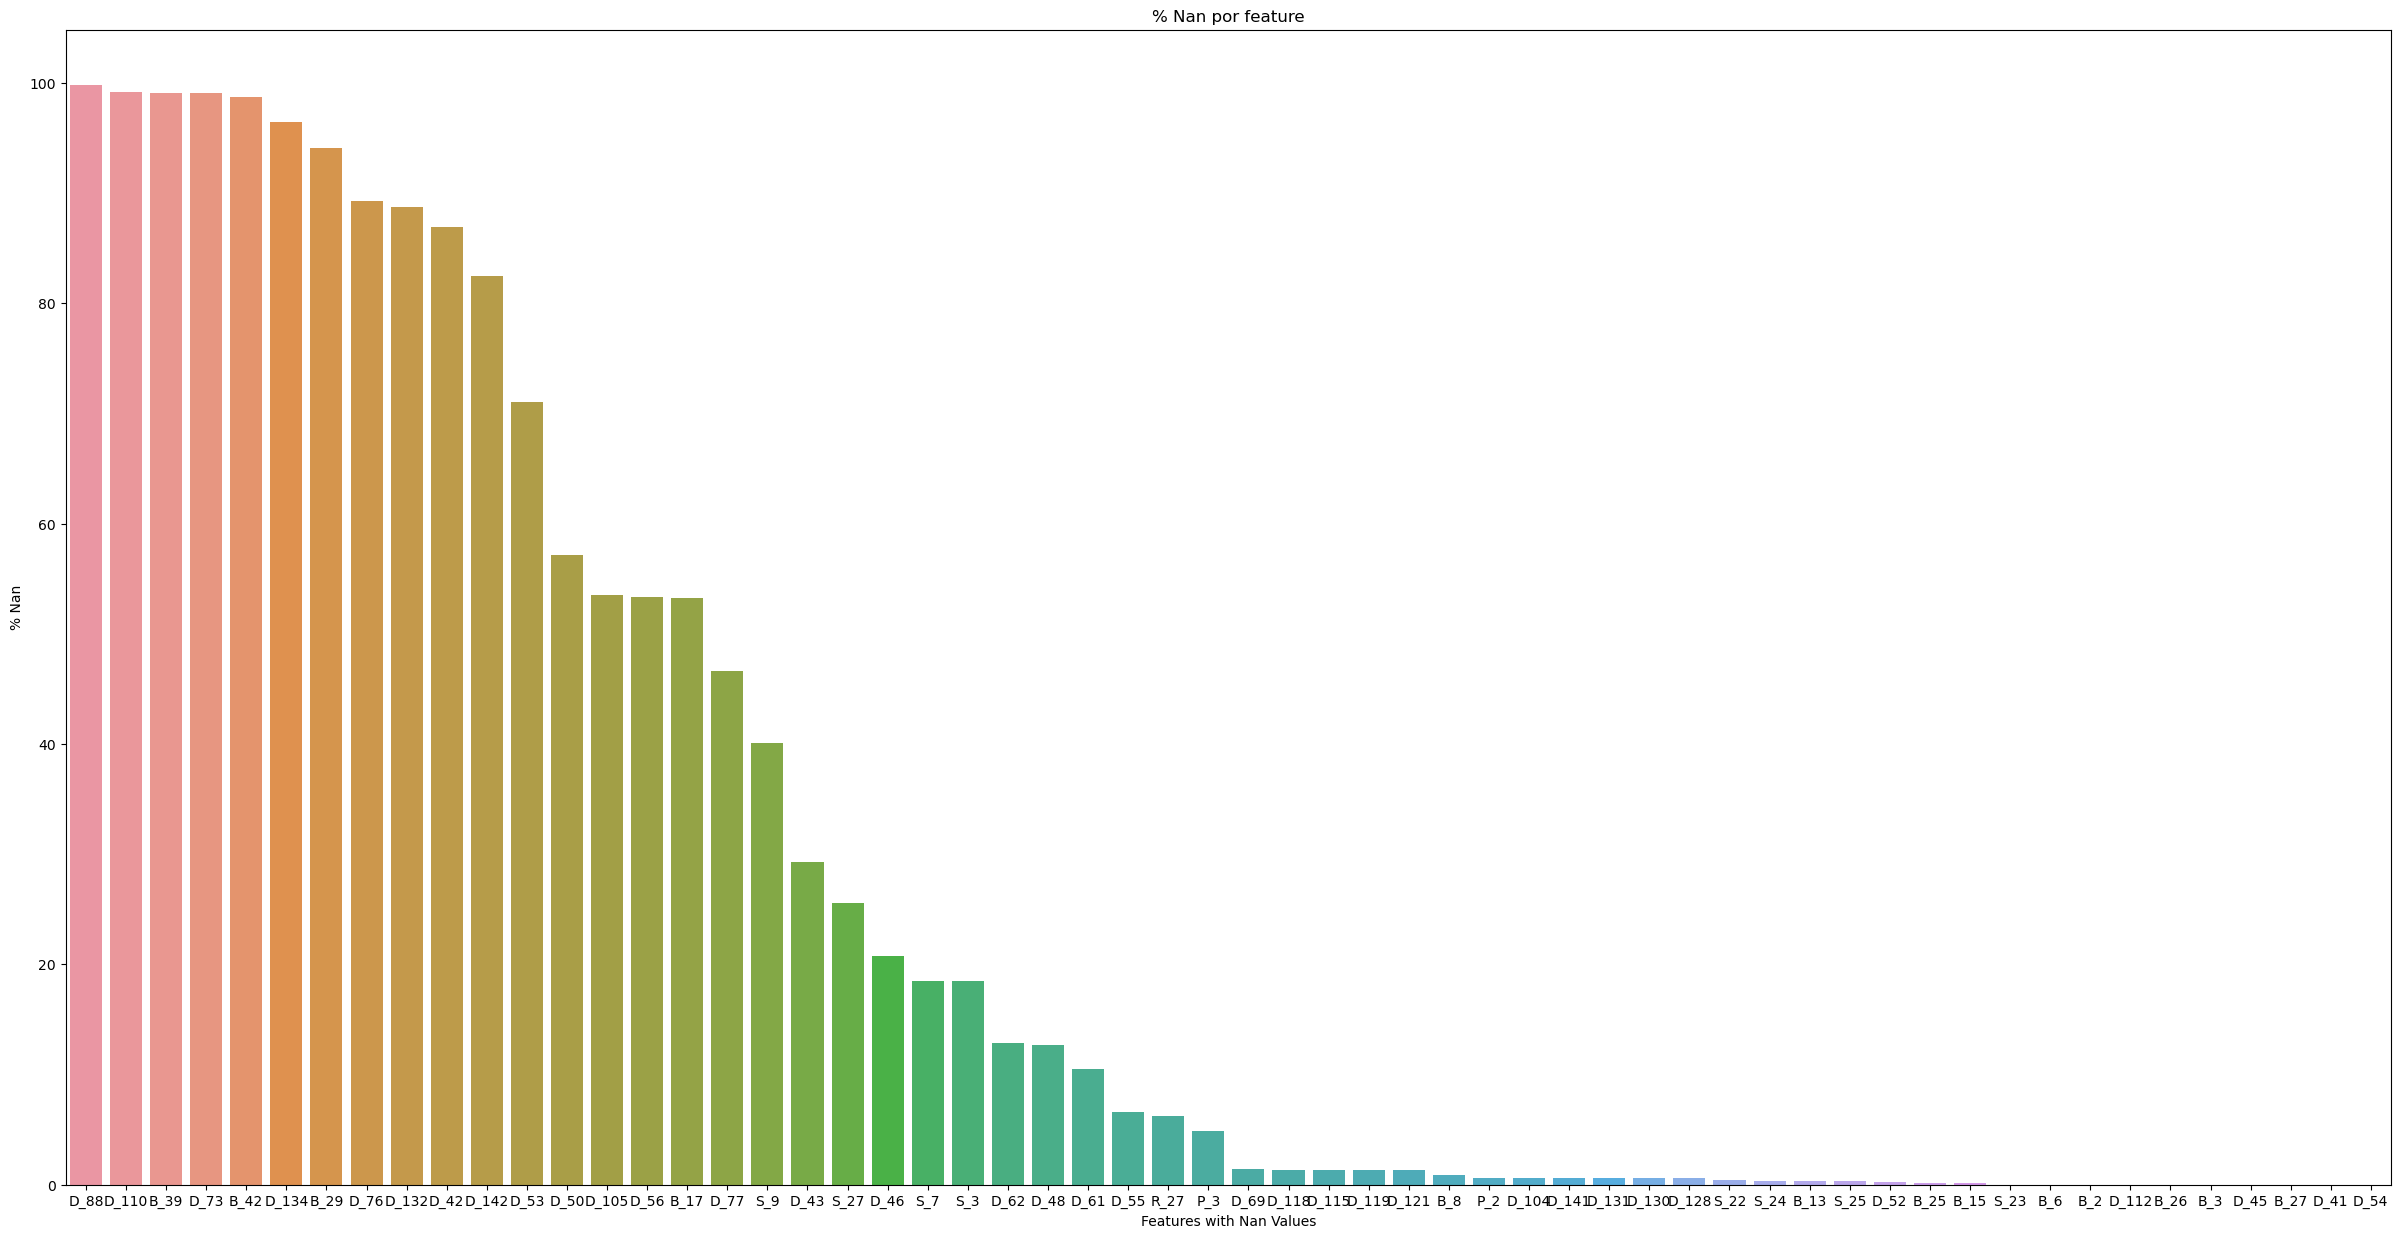

In [37]:
fig, ax = plt.subplots(figsize=(30, 15))

sns.barplot(data=df_plot, x="features", y="%_total")
# ax.title("% De Nan por feature")
ax.set(title="% Nan por feature")
ax.set_xlabel("Features with Nan Values")
ax.set_ylabel("% Nan")

# 1. EDA


## Columns in the dataset are divided in the following groups:

- D\_\*: Delinquency variables
- S\_\*: Spend variables
- P\_\*: Payment variables
- B\_\*: Balance variables
- R \_\*: Risk variables

* Following features are categorical: B_30, B_38, D_63, D_64, D_66, D_68, D_114, D_116, D_117, D_120, D_126.

- S_2: contains a timestamp


In [38]:
train.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 190 columns):
 #    Column  Non-Null Count   Dtype         
---   ------  --------------   -----         
 0    S_2     458913 non-null  datetime64[ns]
 1    P_2     455944 non-null  float32       
 2    D_39    458913 non-null  int16         
 3    B_1     458913 non-null  float32       
 4    B_2     458882 non-null  float32       
 5    R_1     458913 non-null  float32       
 6    S_3     373943 non-null  float32       
 7    D_41    458882 non-null  float32       
 8    B_3     458882 non-null  float32       
 9    D_42    59910 non-null   float32       
 10   D_43    324591 non-null  float32       
 11   D_44    458913 non-null  int8          
 12   B_4     458913 non-null  int16         
 13   D_45    458882 non-null  float32       
 14   B_5     458913 non-null  float

In [39]:
train.S_2.min(), train.S_2.max()

(Timestamp('2018-03-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

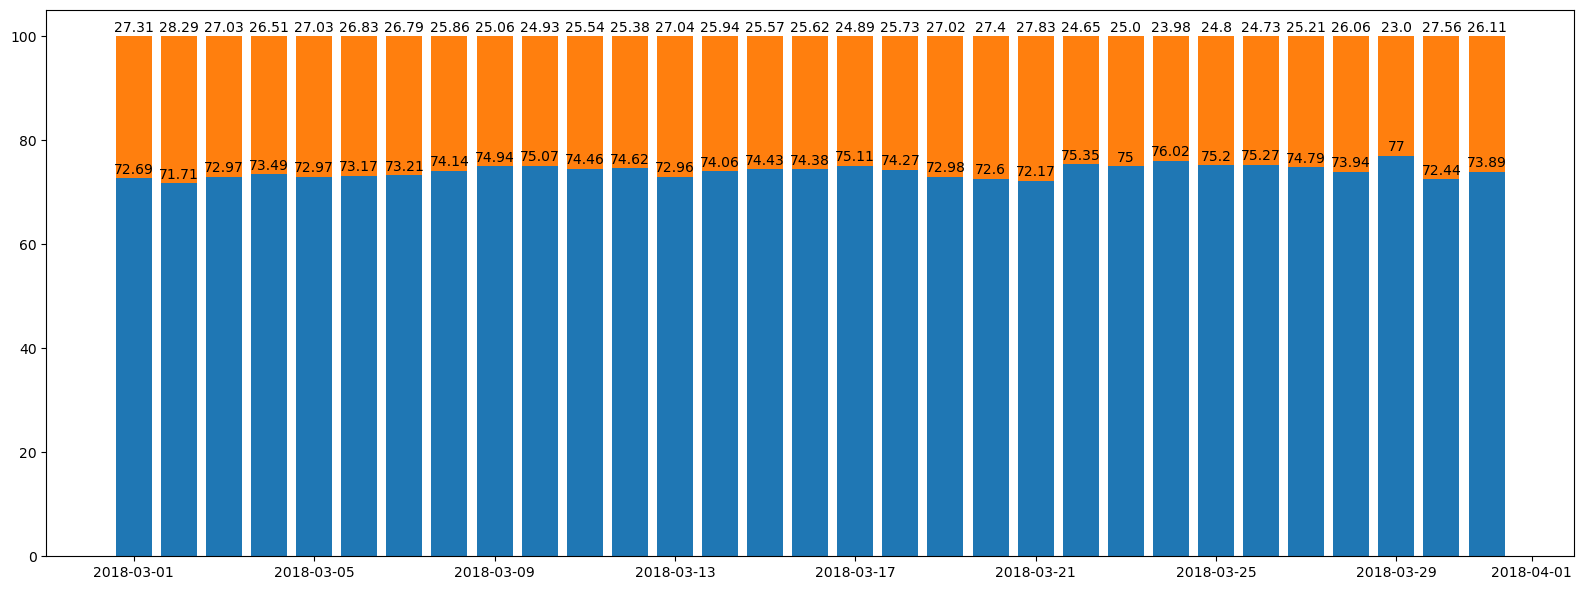

In [43]:
target = pd.DataFrame(
    data={"Default": round(train.groupby("S_2")["target"].mean() * 100, 2)}
)
target["paid"] = round(np.abs(train.groupby("S_2")["target"].mean() - 1) * 100, 2)
target2 = target.loc[(target.index >= "2018-03-01") & (target.index <= "2018-03-31")]
width = 0.8

fig, ax = plt.subplots(1, figsize=(16, 6))

p1 = ax.bar(target2.index, target2.paid, label="Paid", width=width)

p2 = ax.bar(
    target2.index, target2.Default, bottom=target2.paid, label="Default", width=width
)

fig.tight_layout()

ax.bar_label(p1, padding=1)
ax.bar_label(p2, labels=target2.Default, padding=1);

### Insight - Looks like the proportion is consistent acrros all days.


## Time to look all the variables by type:

- D\_\* = Delinquency variables


In [44]:
train.head(1)

S_2       P_2  D_39  \
customer_ID                                                                     
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb... 2018-03-13  0.934745     0   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009382  1.007647   

                                                         R_1       S_3  D_41  \
customer_ID                                                                    
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006104  0.135021   0.0   

                                                         B_3  D_42  ...  \
customer_ID                                                         ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.007174   NaN  ...   

                                                    D_137  D_138  D_139  \
customer_ID                                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...     -1     -1      0   

                                                    D_140  D_141  D_142  \
customer_ID                                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...      0    0.0    NaN   

                                                    D_143    D_144  D_145  \
customer_ID                                                                 
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...      0  0.00297      0   

                                                    target  
customer_ID                                                 
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...       0  

[1 rows x 190 columns]

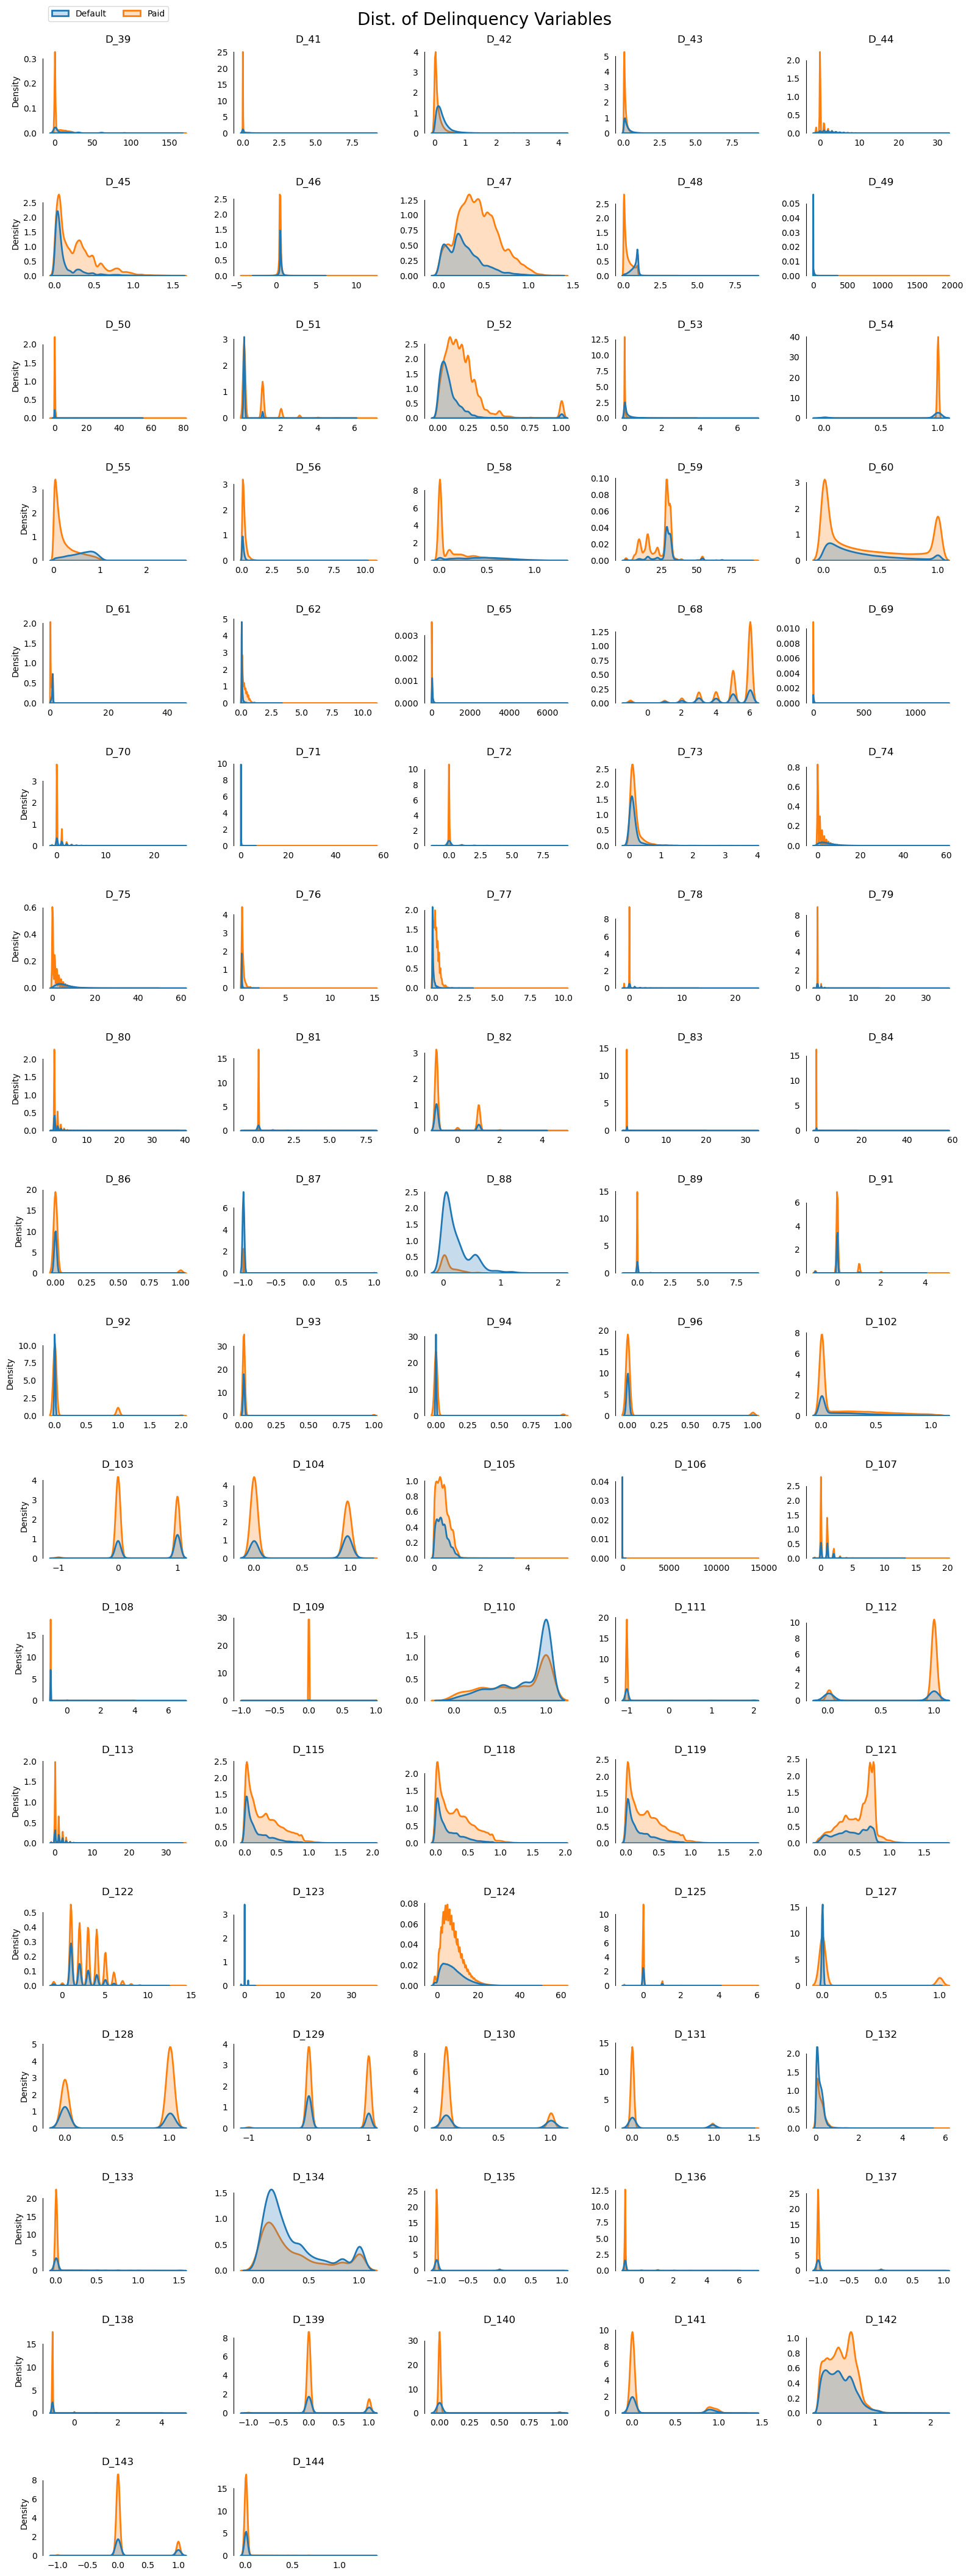

In [45]:
cols = [
    col
    for col in train.columns
    if (col.startswith(("D", "t"))) & (col not in cat_cols[:-1])
]

plot_df = train[cols]

fig, ax = plt.subplots(18, 5, figsize=(16, 54))
fig.suptitle("Dist. of Delinquency Variables", fontsize=20)

row = 0
col = [0, 1, 2, 3, 4] * 18

for i, column in enumerate(plot_df.columns[:-1]):
    if (i != 0) & (i % 5 == 0):
        row += 1
    sns.kdeplot(
        x=column,
        hue="target",
        hue_order=[1, 0],
        label=["Default", "Paid"],
        data=plot_df,
        fill=True,
        linewidth=2,
        legend=False,
        ax=ax[row, col[i]],
    )

    ax[row, col[i]].tick_params(left=False, bottom=False)
    ax[row, col[i]].set(
        title="\n\n{}".format(column),
        xlabel="",
        ylabel=("Density" if i % 5 == 0 else ""),
    )
for i in range(2, 5):
    ax[17, i].set_visible(False)

handles, _ = ax[0, 0].get_legend_handles_labels()

fig.legend(
    labels=["Default", "Paid"],
    handles=reversed(handles),
    ncol=2,
    bbox_to_anchor=(0.18, 0.983),
)
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

Text(0.5, 1.0, 'Correlation between delinquency variables')

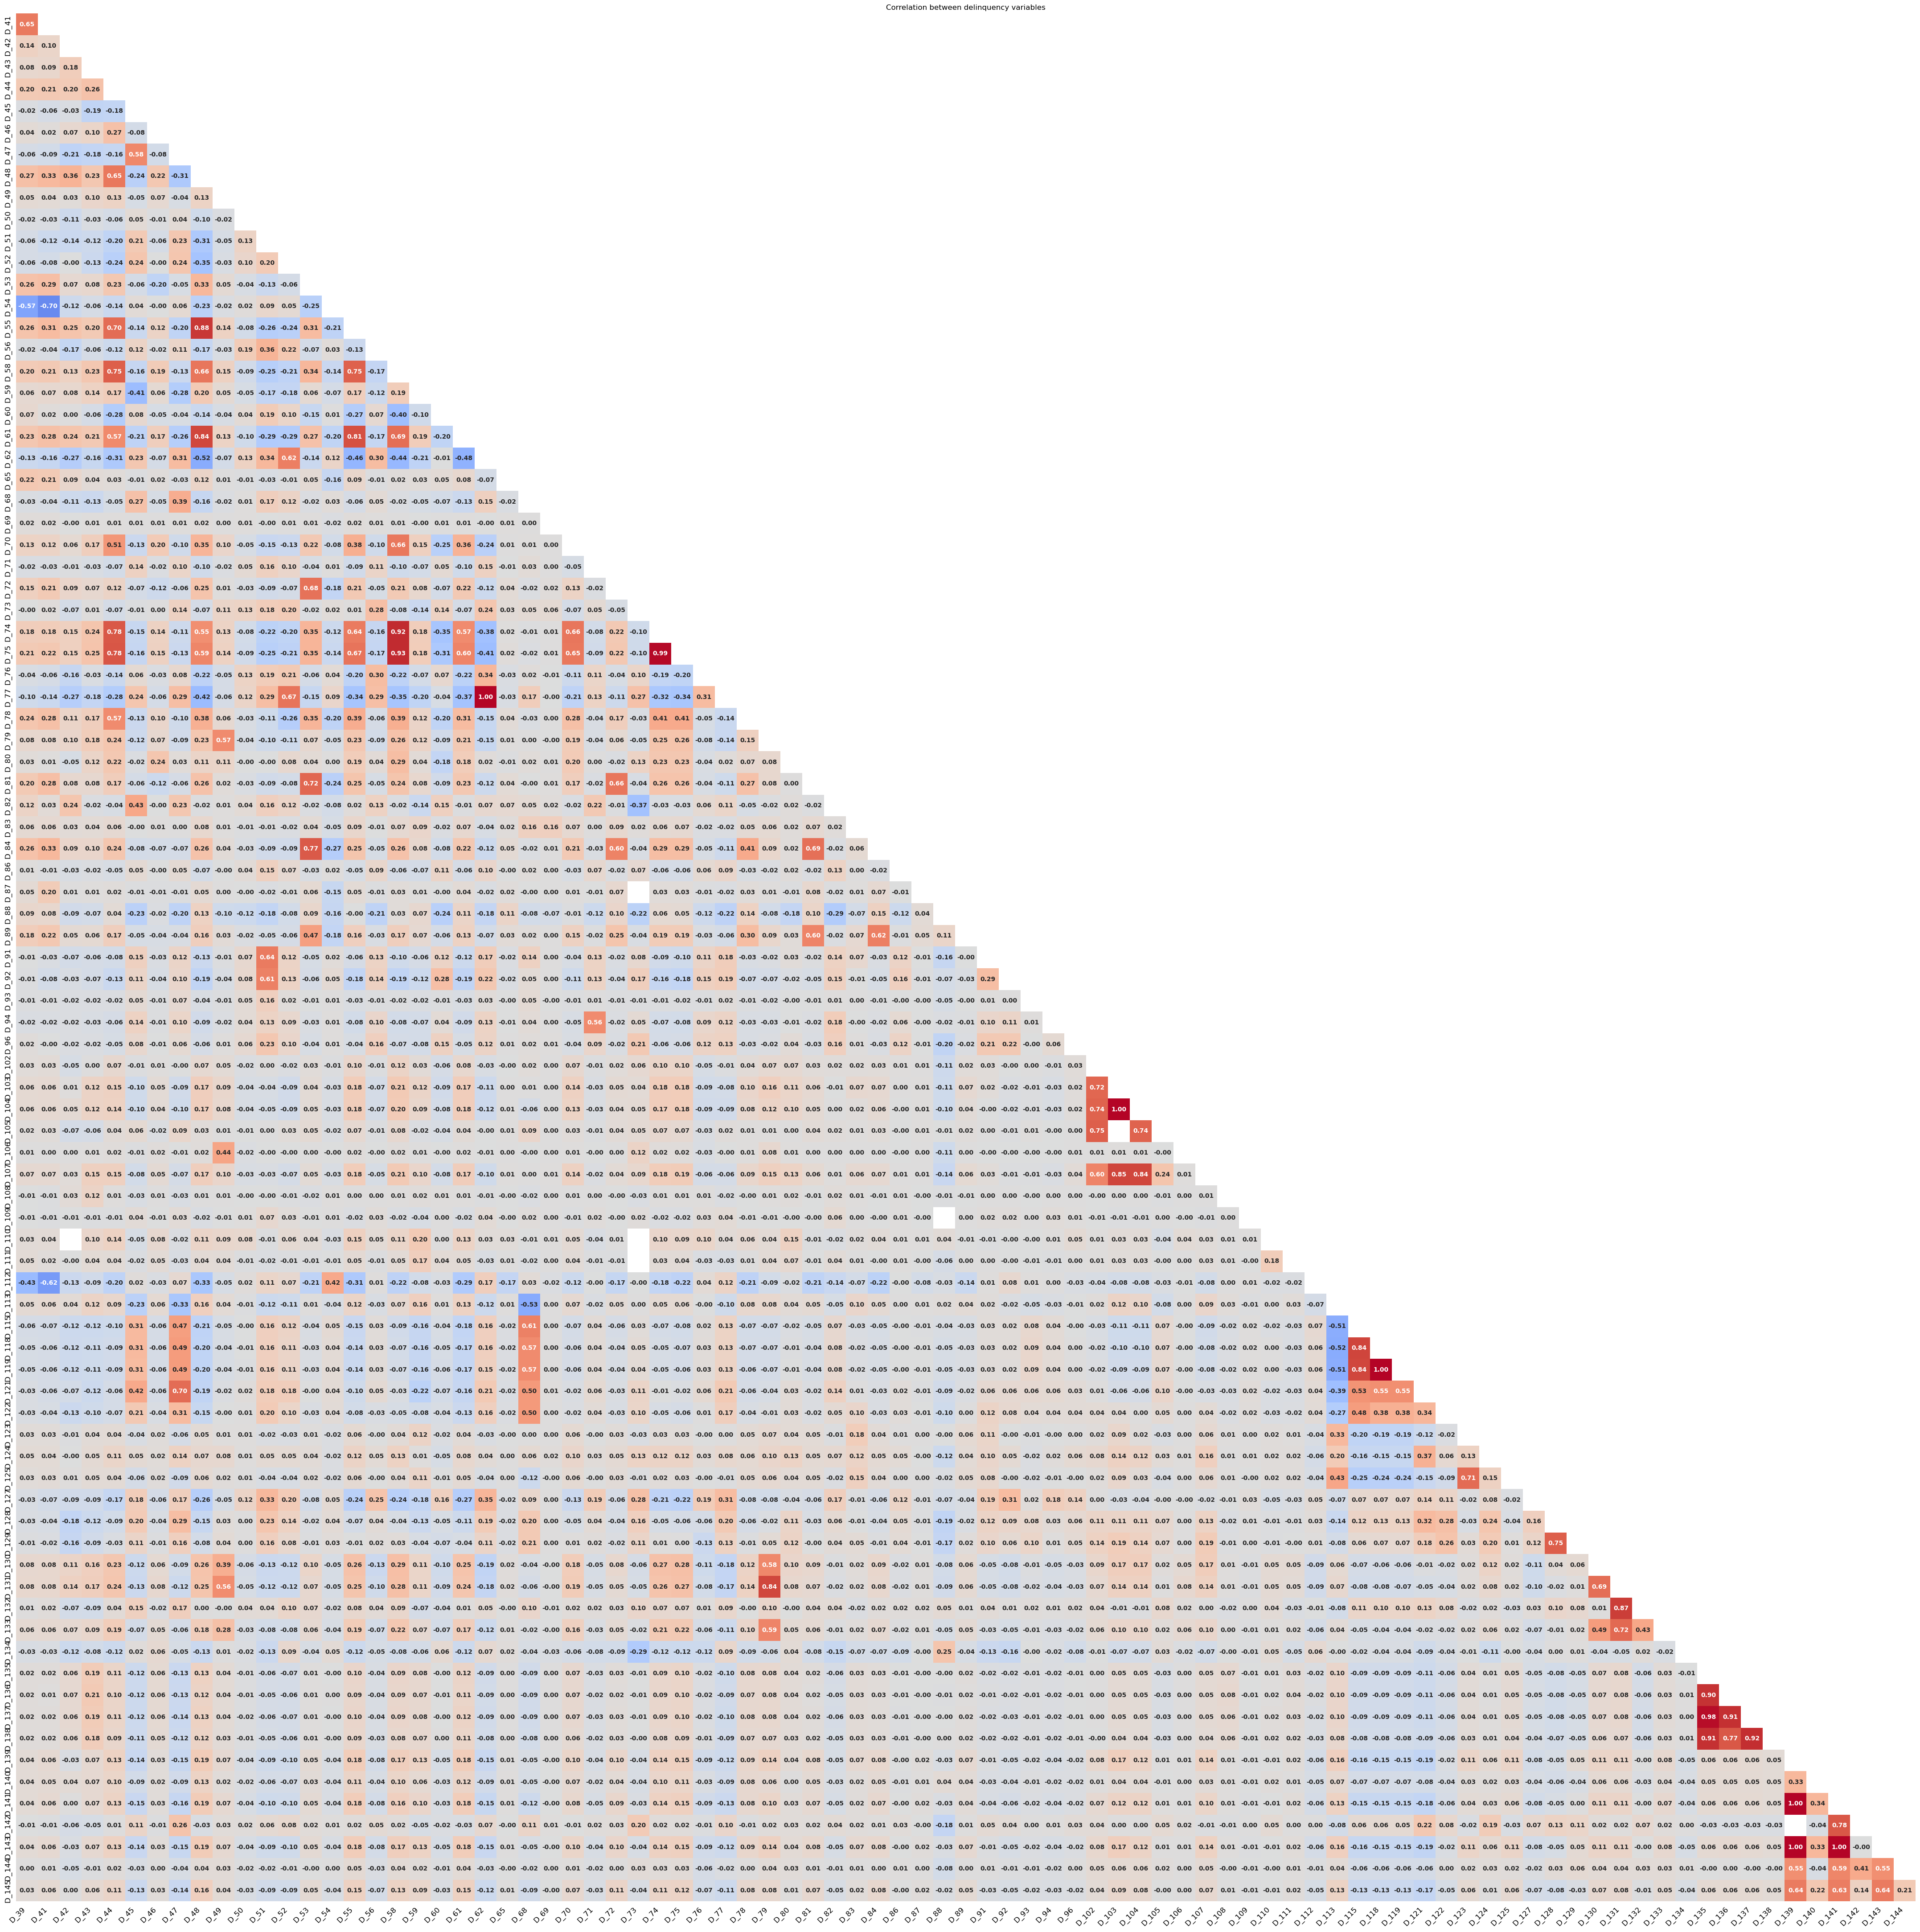

In [46]:
corr = plot_df.iloc[:, :-1].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr = corr.iloc[1:, :-1].copy()

fig, ax = plt.subplots(figsize=(55, 55))
sns.heatmap(
    corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"fontsize": 10, "fontweight": "bold"},
    cbar=False,
)

ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=12
)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title("Correlation between delinquency variables")

In [47]:
def get_redundant_pairs(df):
    """Get diagonal and lower triangular pairs of correlation matrix"""
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

### Many variables(Delinquency) with a strong correlation


- S\_\* = Spend variables


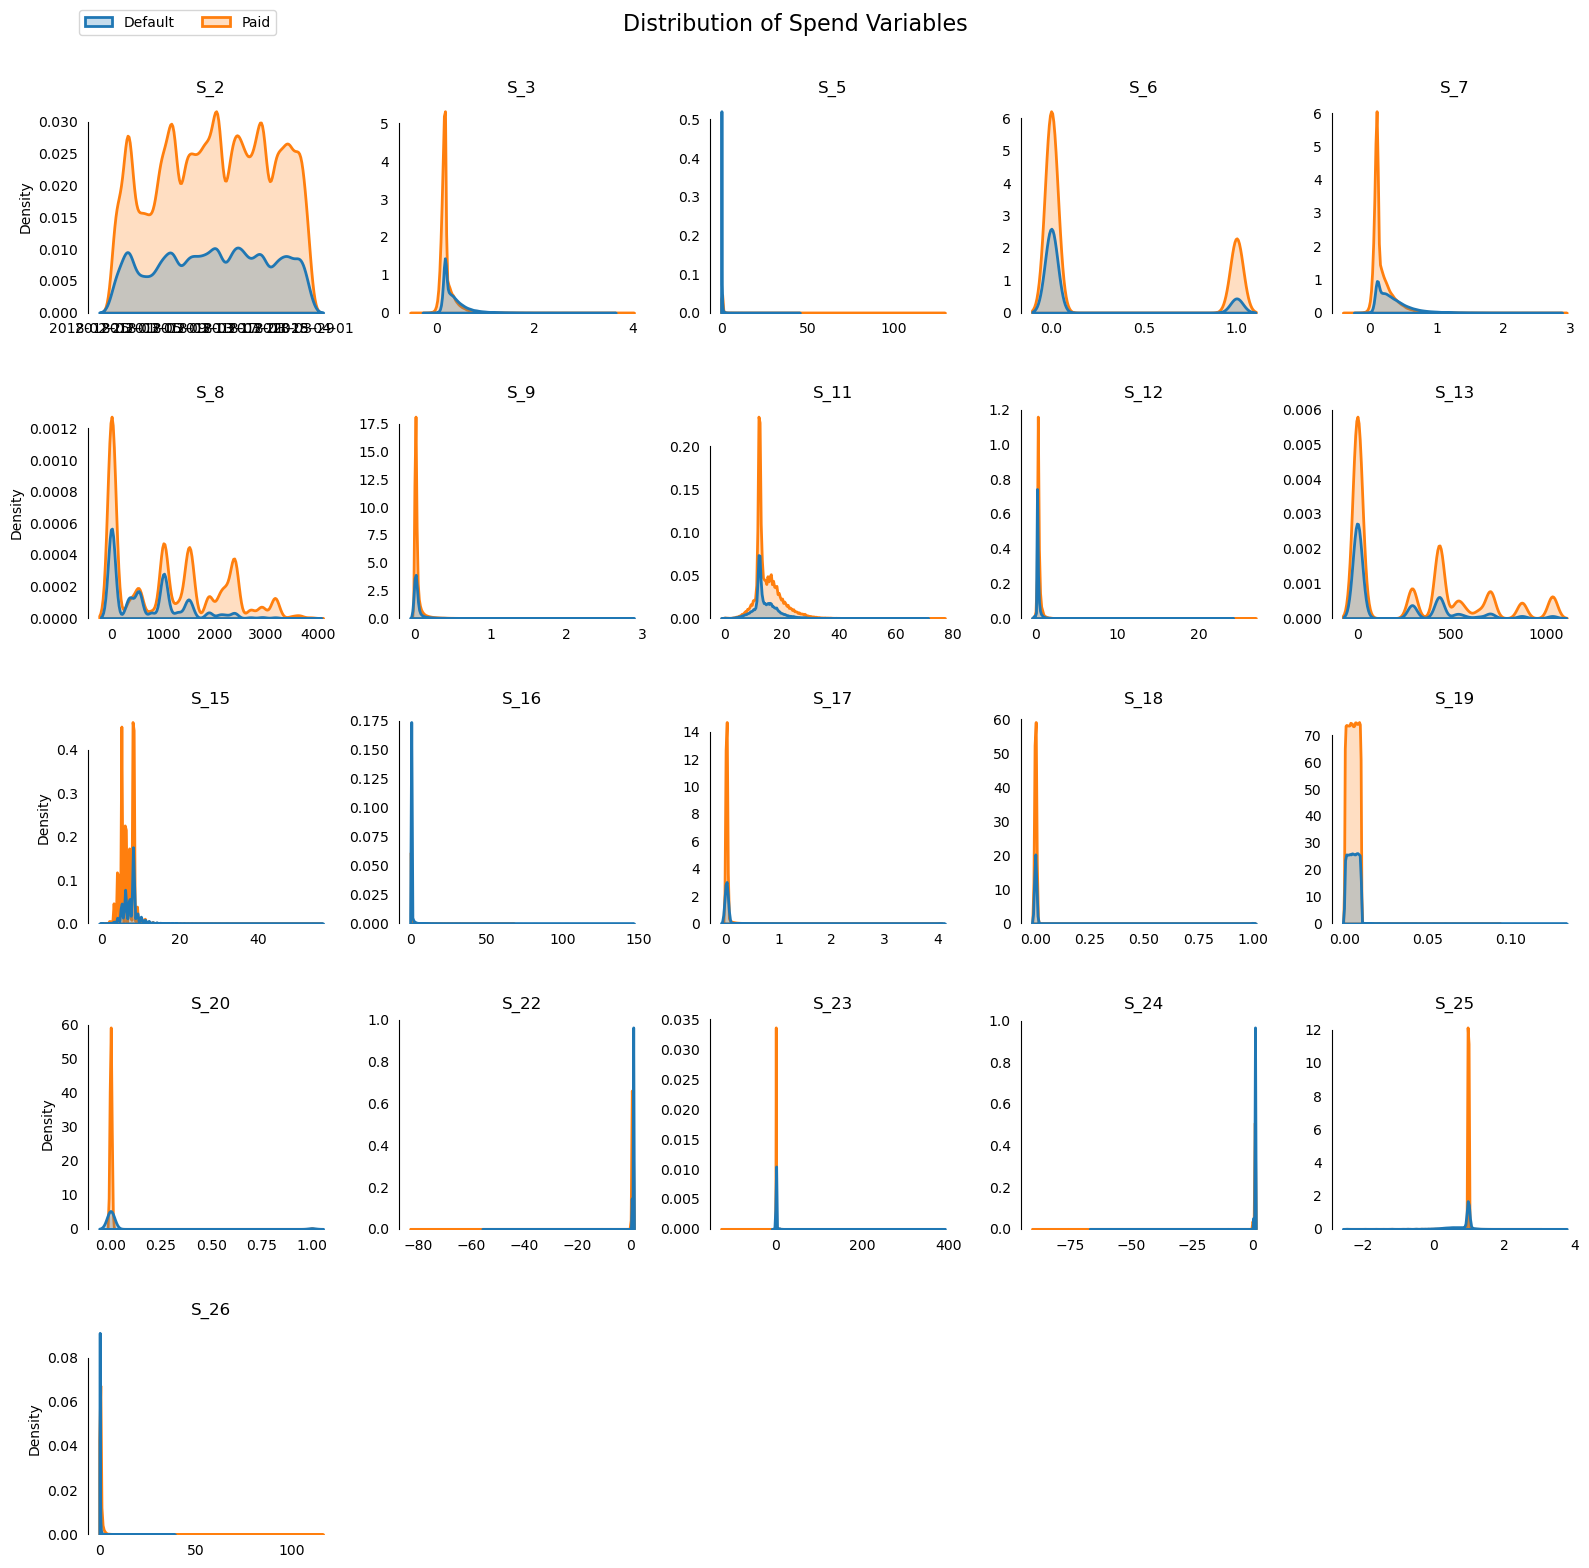

In [48]:
cols = [
    col
    for col in train.columns
    if (col.startswith(("S", "t"))) & (col not in cat_cols[:-1])
]
plot_df = train[cols]
fig, ax = plt.subplots(5, 5, figsize=(16, 20))
fig.suptitle("Distribution of Spend Variables", fontsize=16)
row = 0
col = [0, 1, 2, 3, 4] * 5
for i, column in enumerate(plot_df.columns[:-1]):
    if (i != 0) & (i % 5 == 0):
        row += 1
    sns.kdeplot(
        x=column,
        hue="target",
        hue_order=[1, 0],
        label=["Default", "Paid"],
        data=plot_df,
        fill=True,
        linewidth=2,
        legend=False,
        ax=ax[row, col[i]],
    )
    ax[row, col[i]].tick_params(left=False, bottom=False)
    ax[row, col[i]].set(
        title="\n\n{}".format(column),
        xlabel="",
        ylabel=("Density" if i % 5 == 0 else ""),
    )
for i in range(1, 5):
    ax[4, i].set_visible(False)
handles, _ = ax[0, 0].get_legend_handles_labels()
fig.legend(
    labels=["Default", "Paid"],
    handles=reversed(handles),
    ncol=2,
    bbox_to_anchor=(0.18, 0.985),
)
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

/tmp/ipykernel_1005793/113901764.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


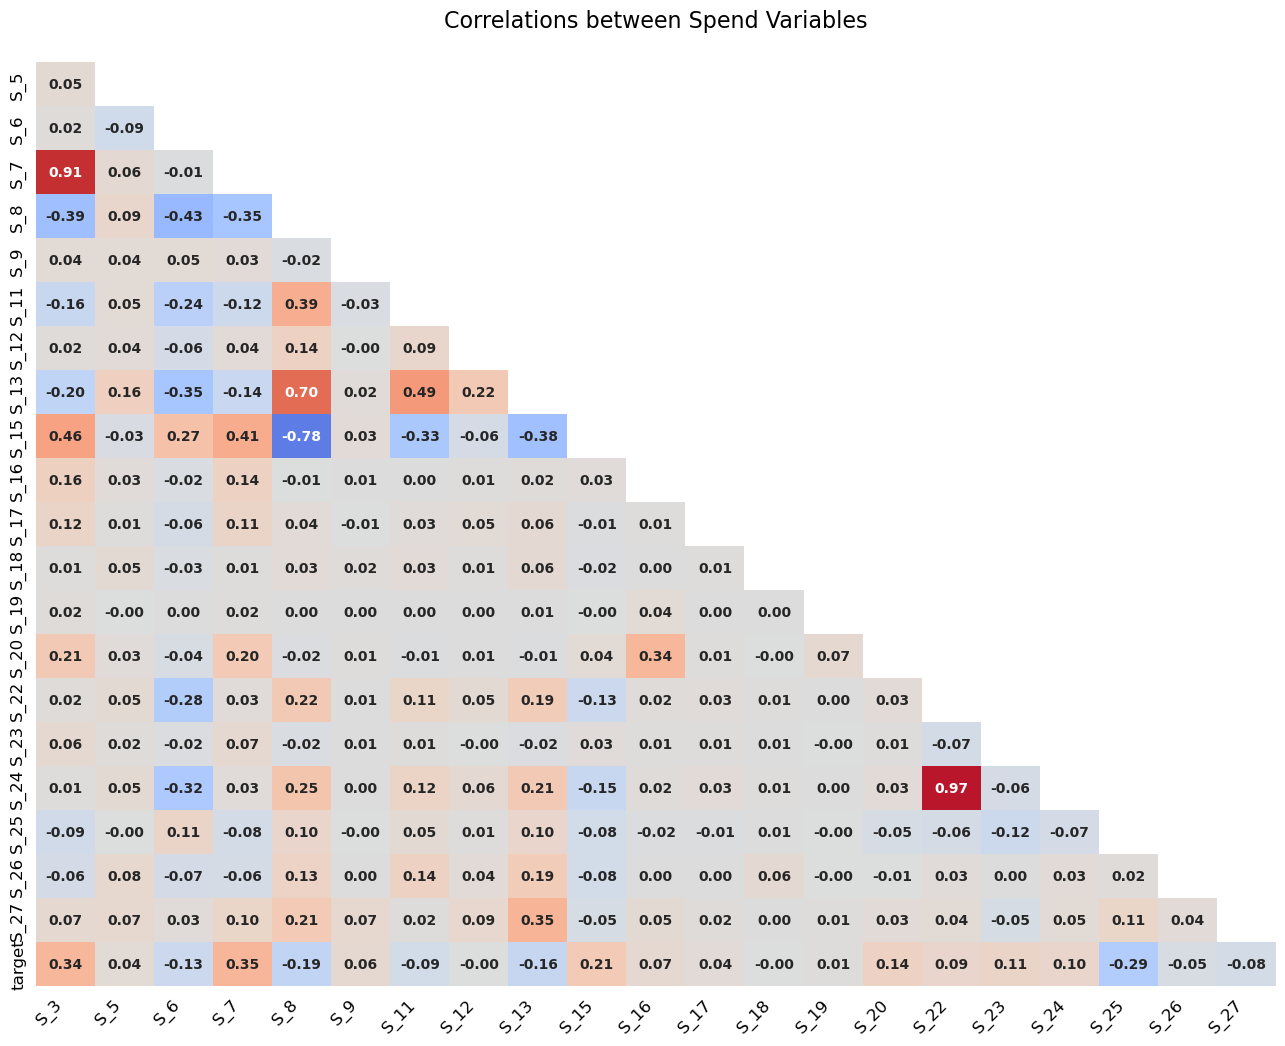

In [49]:
corr = plot_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr = corr.iloc[1:, :-1].copy()
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(
    corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"fontsize": 10, "fontweight": "bold"},
    cbar=False,
)
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=12
)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title("Correlations between Spend Variables\n", fontsize=16)
fig.show()

- P\_\* = Payment variables


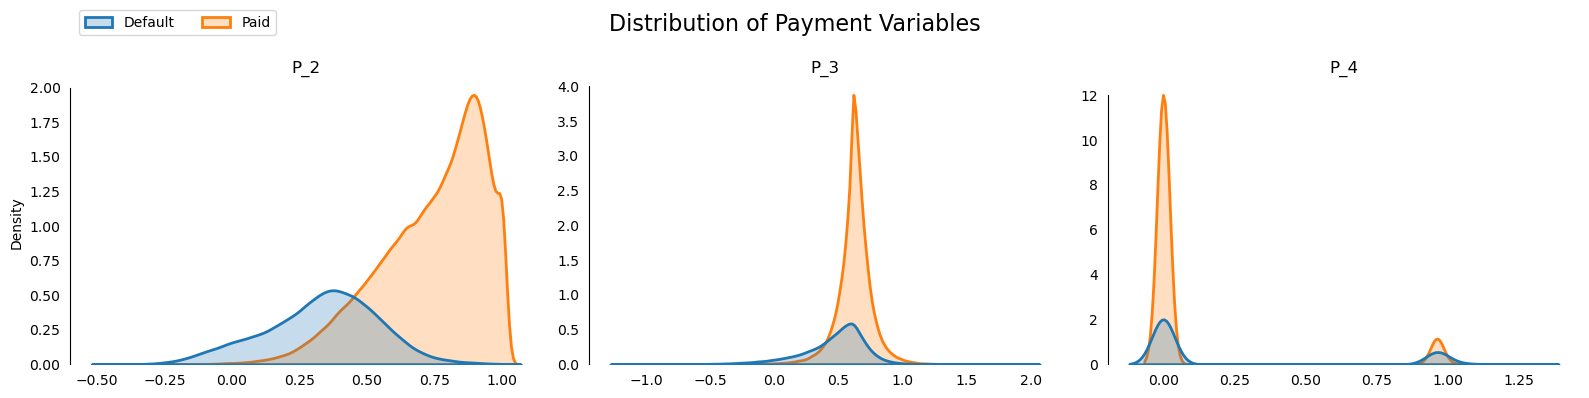

In [50]:
cols = [
    col
    for col in train.columns
    if (col.startswith(("P", "t"))) & (col not in cat_cols[:-1])
]
plot_df = train[cols]
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle("Distribution of Payment Variables", fontsize=16)
for i, col in enumerate(plot_df.columns[:-1]):
    sns.kdeplot(
        x=col,
        hue="target",
        hue_order=[1, 0],
        label=["Default", "Paid"],
        data=plot_df,
        fill=True,
        linewidth=2,
        legend=False,
        ax=ax[i],
    )
    ax[i].tick_params(left=False, bottom=False)
    ax[i].set(title="{}".format(col), xlabel="", ylabel=("Density" if i == 0 else ""))
handles, _ = ax[0].get_legend_handles_labels()
fig.legend(
    labels=["Default", "Paid"],
    handles=reversed(handles),
    ncol=2,
    bbox_to_anchor=(0.18, 1),
)
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

/tmp/ipykernel_1005793/1884314771.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


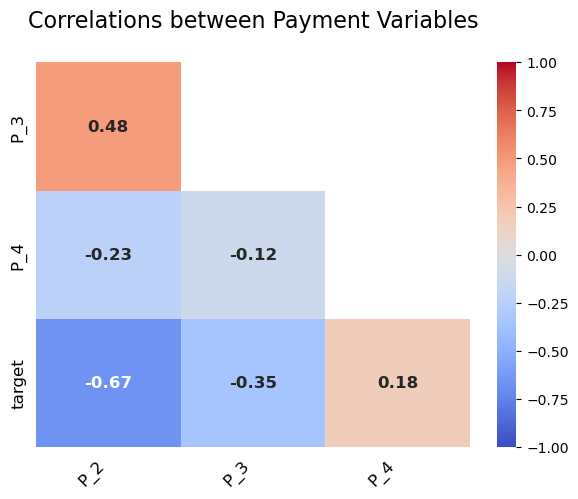

In [51]:
corr = plot_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr = corr.iloc[1:, :-1].copy()
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(
    corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"fontsize": 12, "fontweight": "bold"},
)
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=12
)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title("Correlations between Payment Variables\n", fontsize=16)
fig.show()

- B\_\* = Balance variables


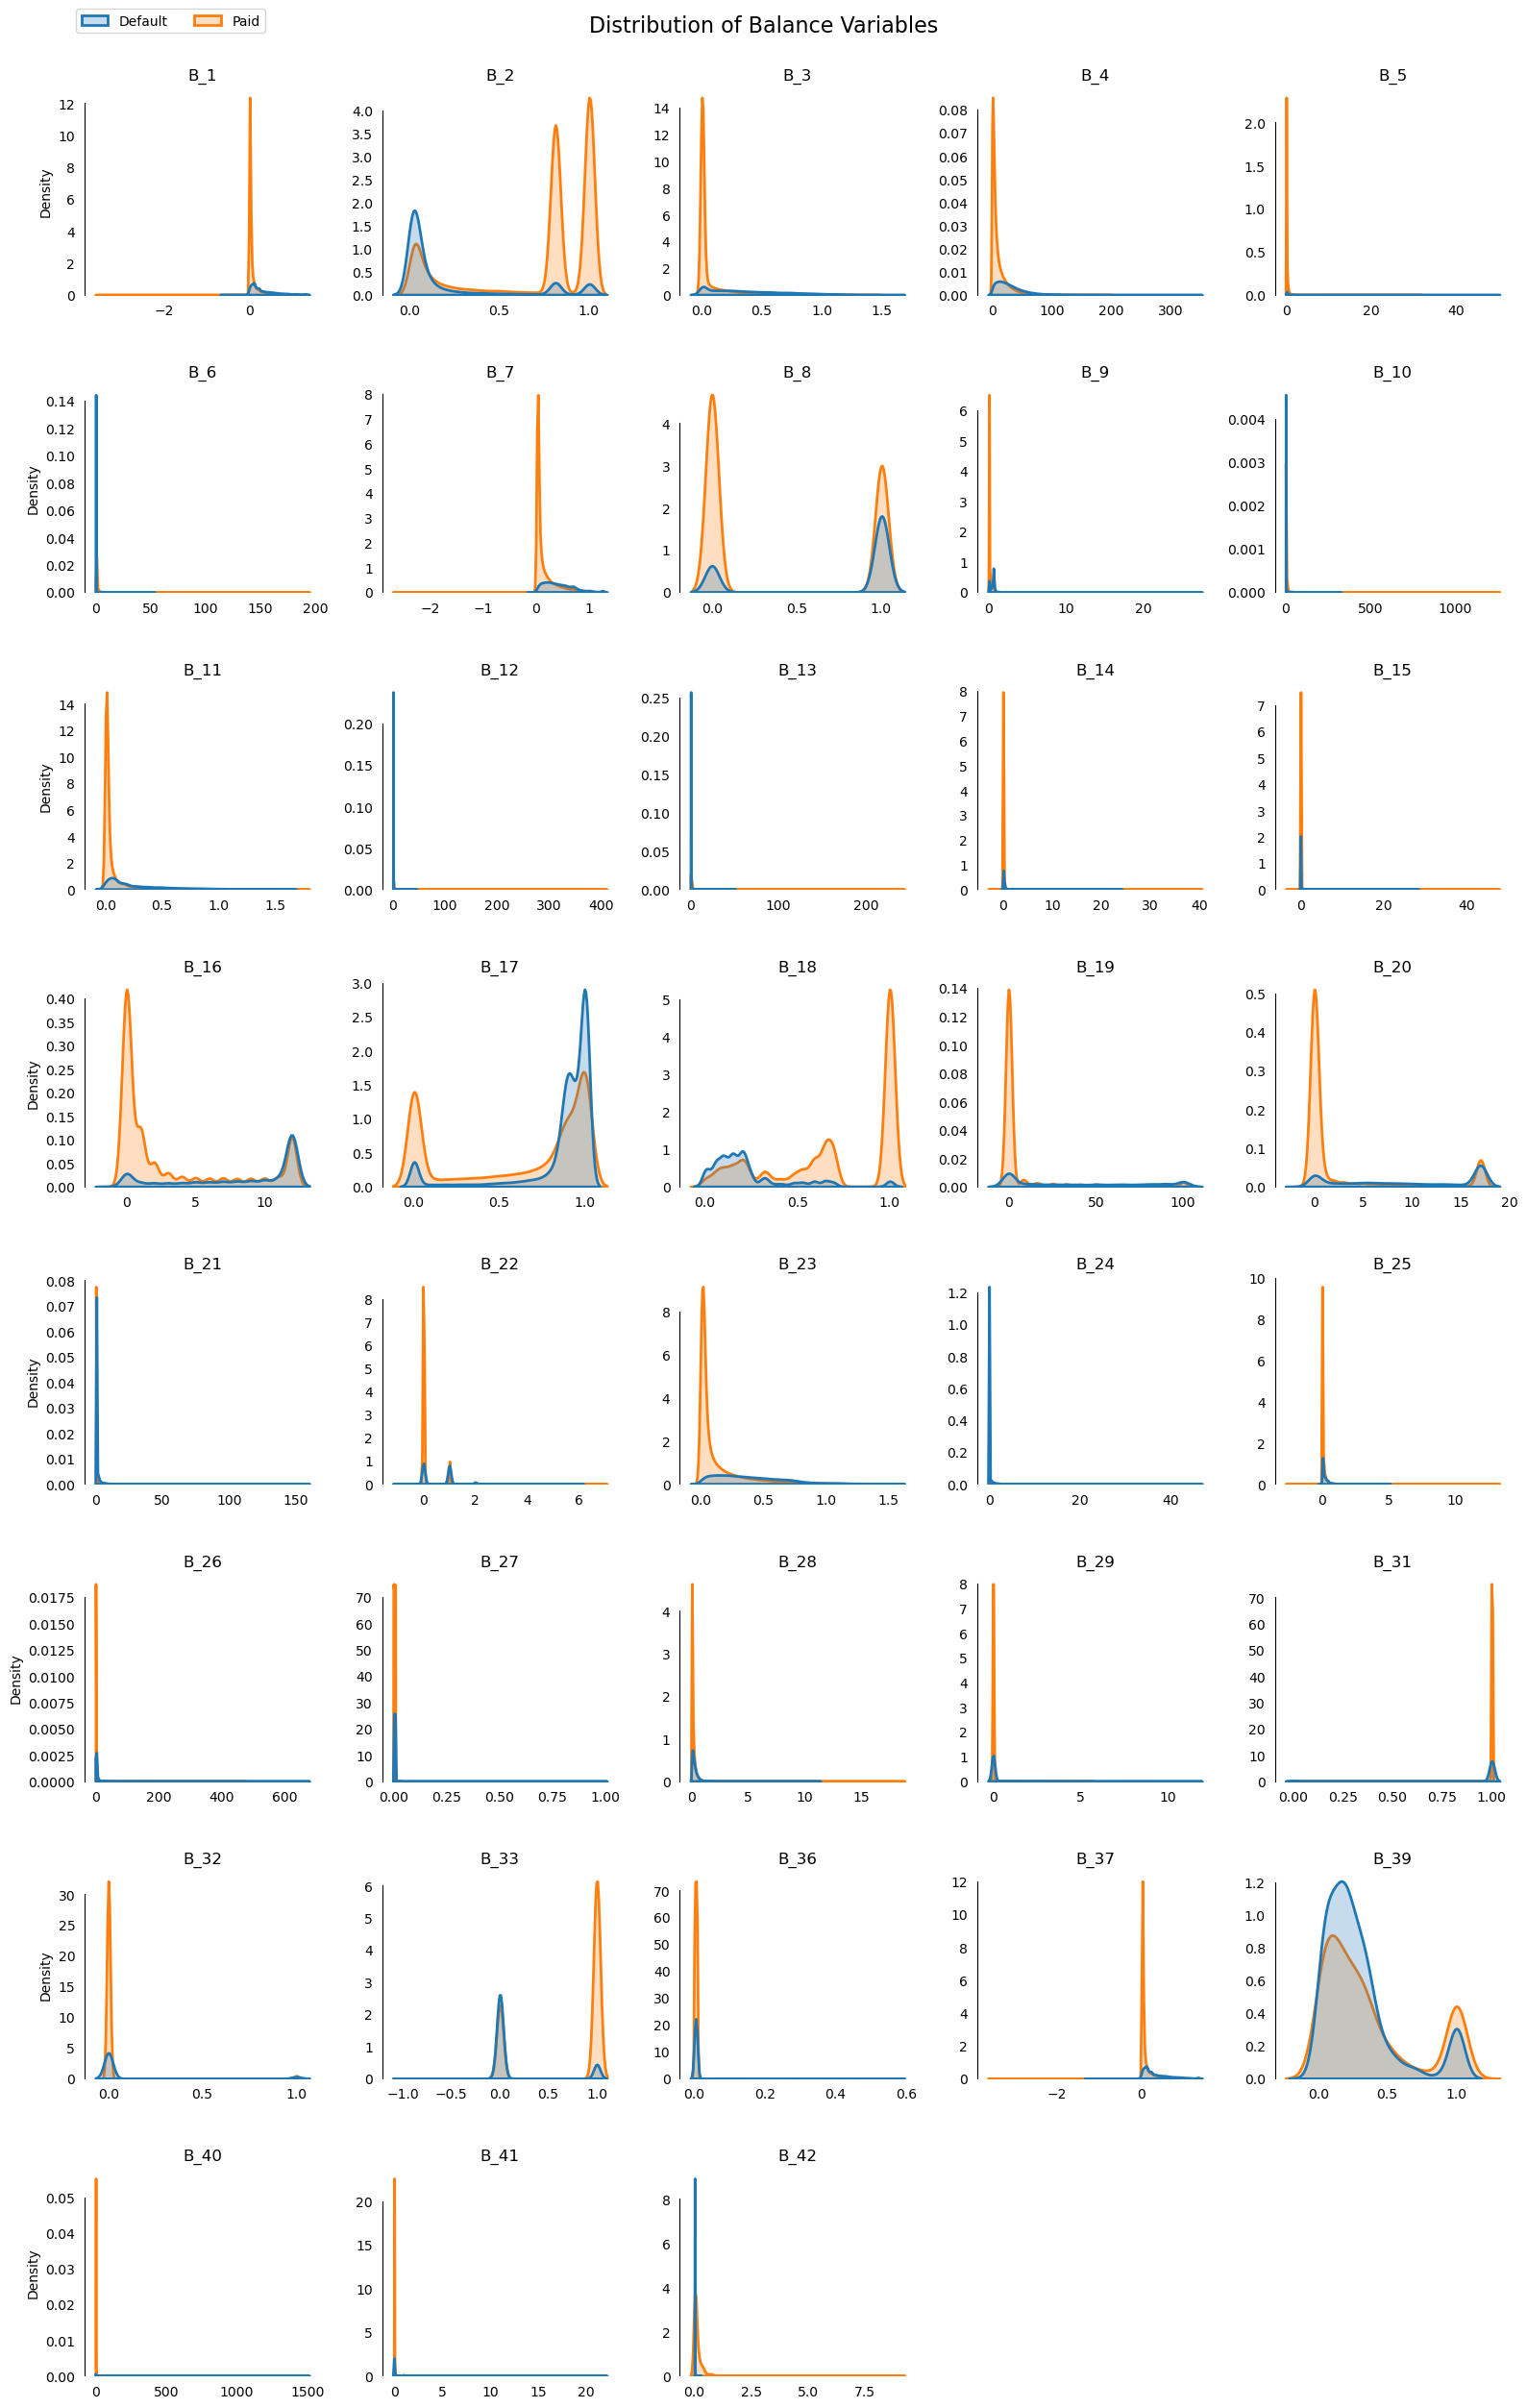

In [52]:
cols = [
    col
    for col in train.columns
    if (col.startswith(("B", "t"))) & (col not in cat_cols[:-1])
]
plot_df = train[cols]
fig, ax = plt.subplots(8, 5, figsize=(16, 32))
fig.suptitle("Distribution of Balance Variables", fontsize=16)
row = 0
col = [0, 1, 2, 3, 4] * 8
for i, column in enumerate(plot_df.columns[:-1]):
    if (i != 0) & (i % 5 == 0):
        row += 1
    sns.kdeplot(
        x=column,
        hue="target",
        hue_order=[1, 0],
        label=["Default", "Paid"],
        data=plot_df,
        fill=True,
        linewidth=2,
        legend=False,
        ax=ax[row, col[i]],
    )
    ax[row, col[i]].tick_params(left=False, bottom=False)
    ax[row, col[i]].set(
        title="\n\n{}".format(column),
        xlabel="",
        ylabel=("Density" if i % 5 == 0 else ""),
    )
for i in range(3, 5):
    ax[7, i].set_visible(False)
handles, _ = ax[0, 0].get_legend_handles_labels()
fig.legend(
    labels=["Default", "Paid"],
    handles=reversed(handles),
    ncol=2,
    bbox_to_anchor=(0.18, 0.984),
)
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

/tmp/ipykernel_1005793/3822983078.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


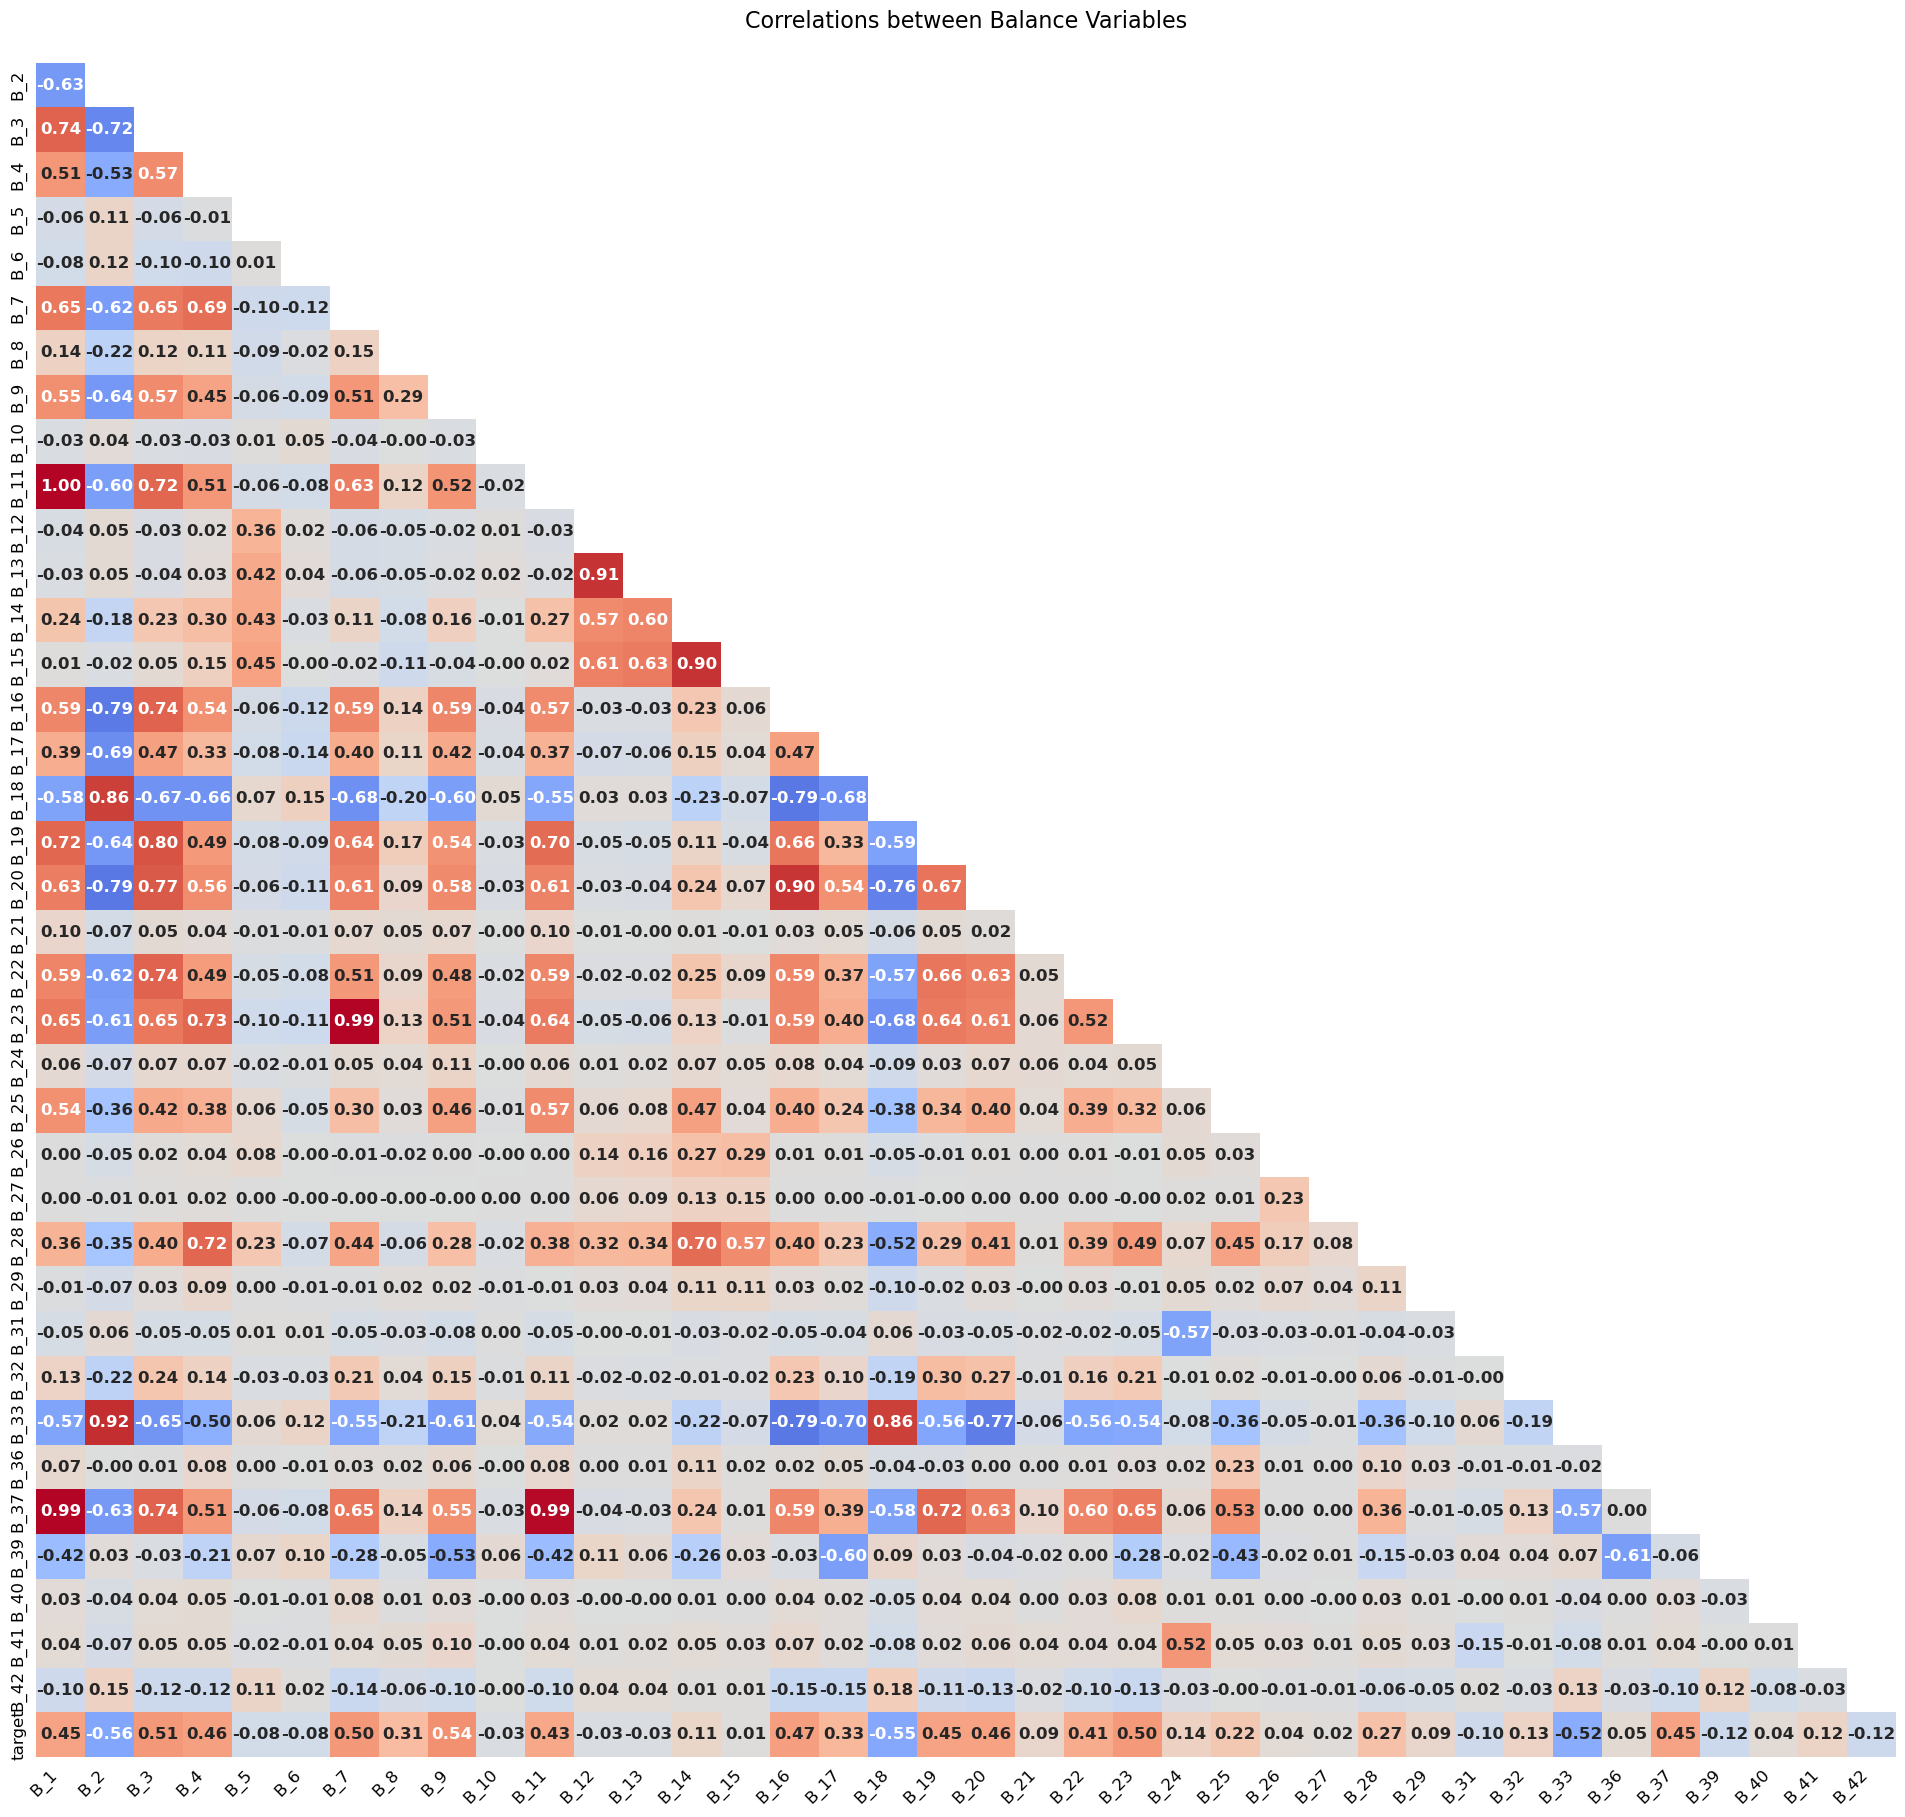

In [53]:
corr = plot_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr = corr.iloc[1:, :-1].copy()
fig, ax = plt.subplots(figsize=(24, 22))
sns.heatmap(
    corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"fontsize": 12, "fontweight": "bold"},
    cbar=False,
)
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=12
)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title("Correlations between Balance Variables\n", fontsize=16)
fig.show()

- R\_\* = Risk variables


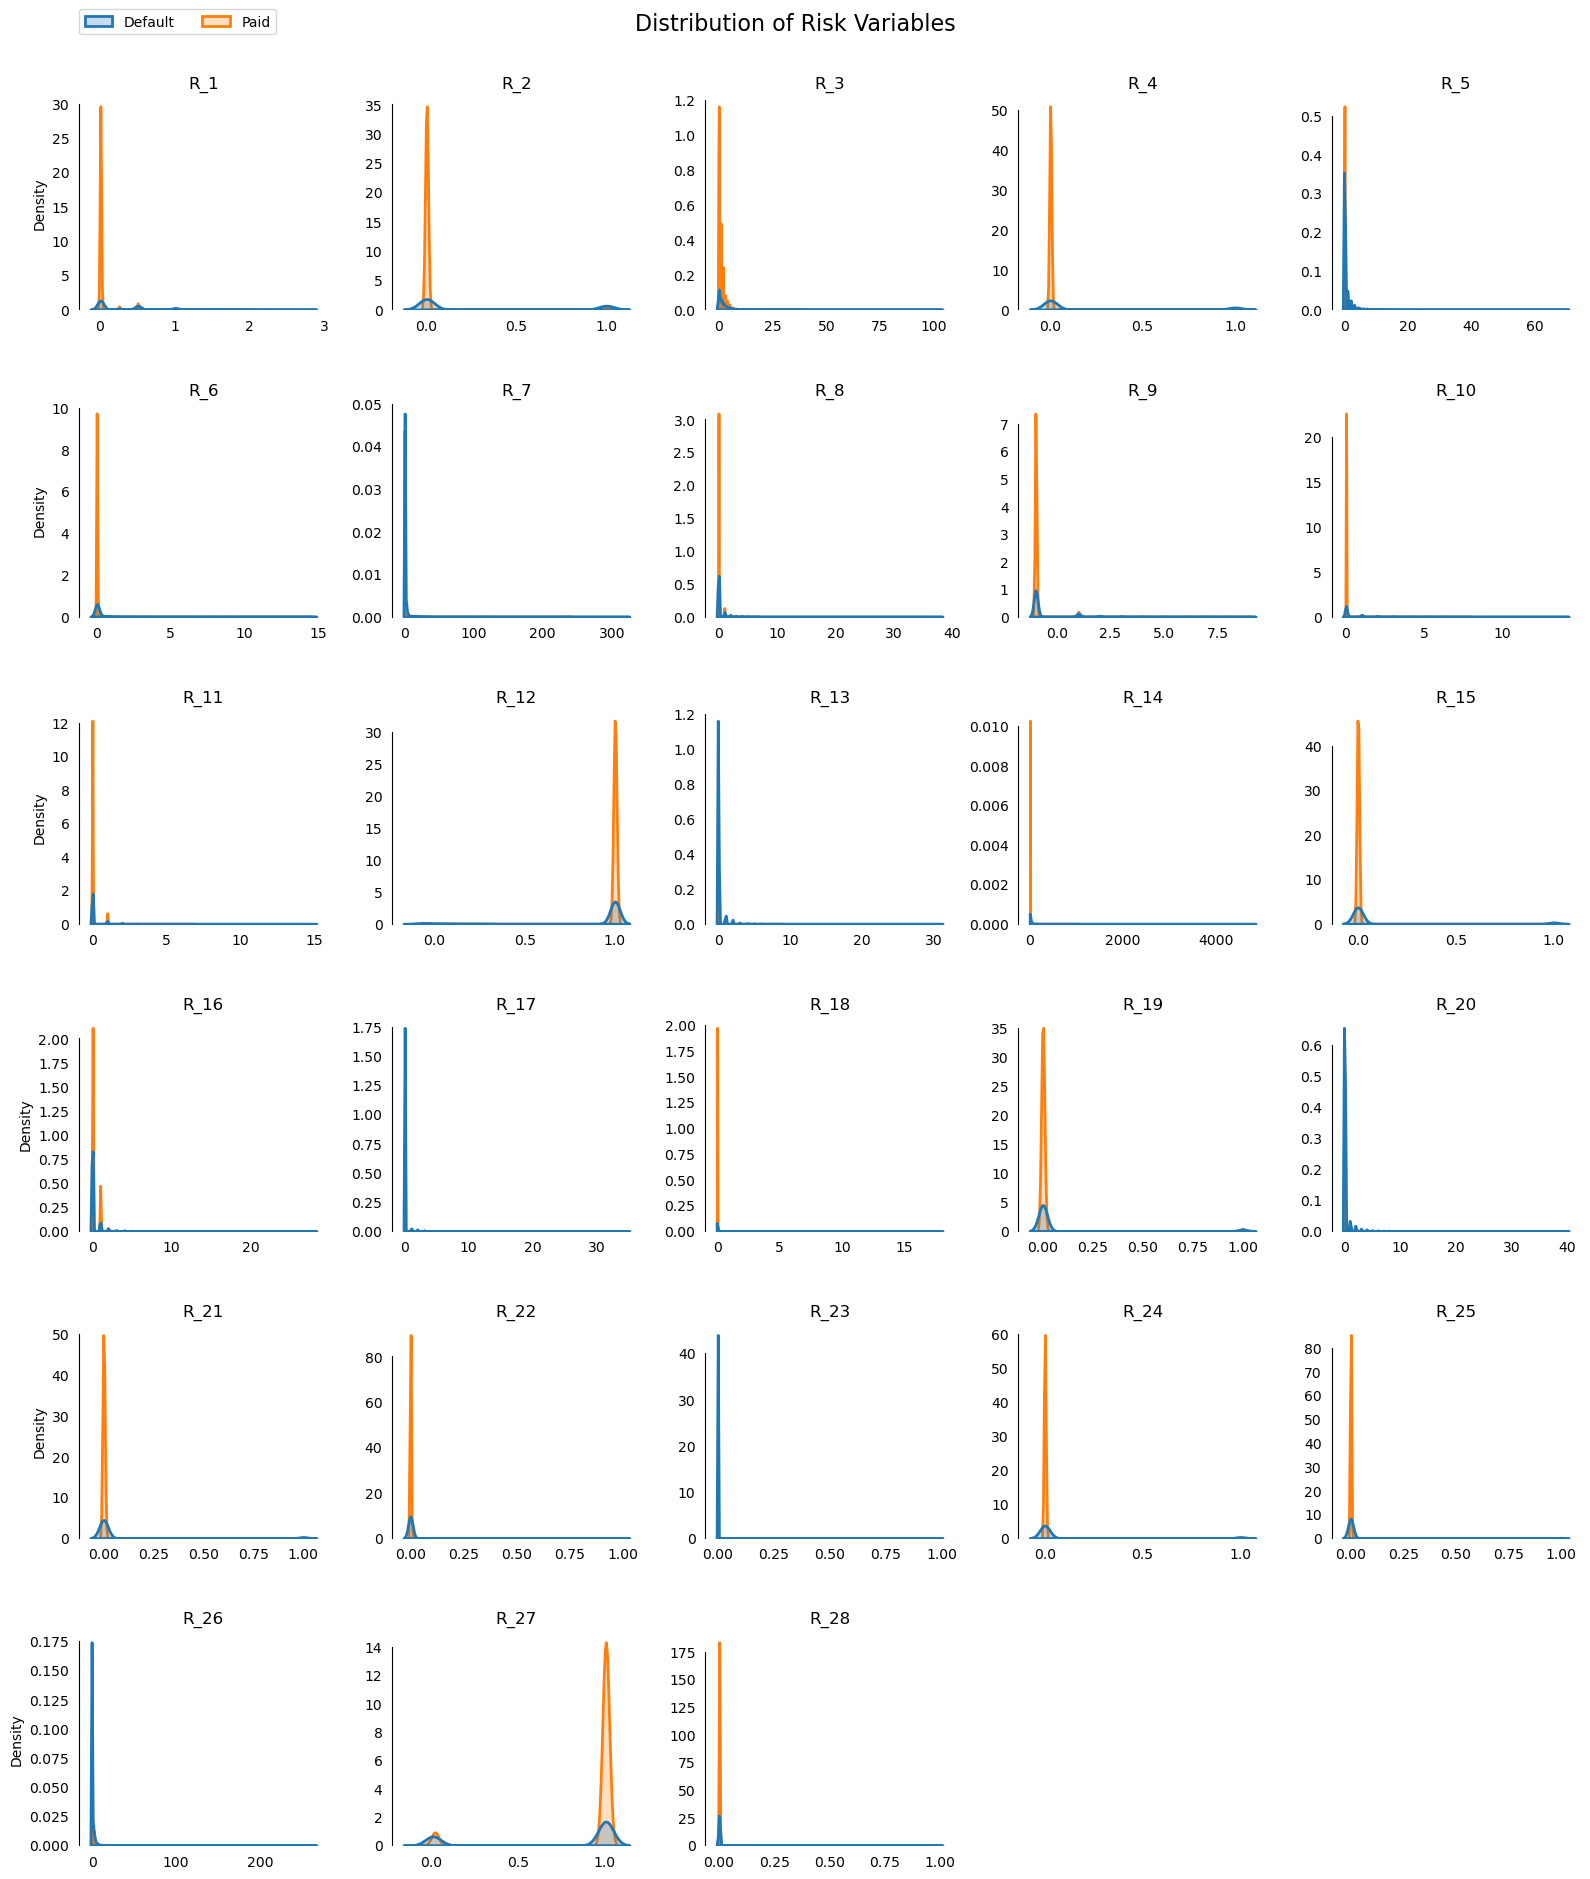

In [54]:
cols = [
    col
    for col in train.columns
    if (col.startswith(("R", "t"))) & (col not in cat_cols[:-1])
]
plot_df = train[cols]
fig, ax = plt.subplots(6, 5, figsize=(16, 24))
fig.suptitle("Distribution of Risk Variables", fontsize=16)
row = 0
col = [0, 1, 2, 3, 4] * 6
for i, column in enumerate(plot_df.columns[:-1]):
    if (i != 0) & (i % 5 == 0):
        row += 1
    sns.kdeplot(
        x=column,
        hue="target",
        hue_order=[1, 0],
        label=["Default", "Paid"],
        data=plot_df,
        fill=True,
        linewidth=2,
        legend=False,
        ax=ax[row, col[i]],
    )
    ax[row, col[i]].tick_params(left=False, bottom=False)
    ax[row, col[i]].set(
        title="\n\n{}".format(column),
        xlabel="",
        ylabel=("Density" if i % 5 == 0 else ""),
    )
for i in range(3, 5):
    ax[5, i].set_visible(False)
handles, _ = ax[0, 0].get_legend_handles_labels()
fig.legend(
    labels=["Default", "Paid"],
    handles=reversed(handles),
    ncol=2,
    bbox_to_anchor=(0.18, 0.984),
)
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

/tmp/ipykernel_1005793/1739831413.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


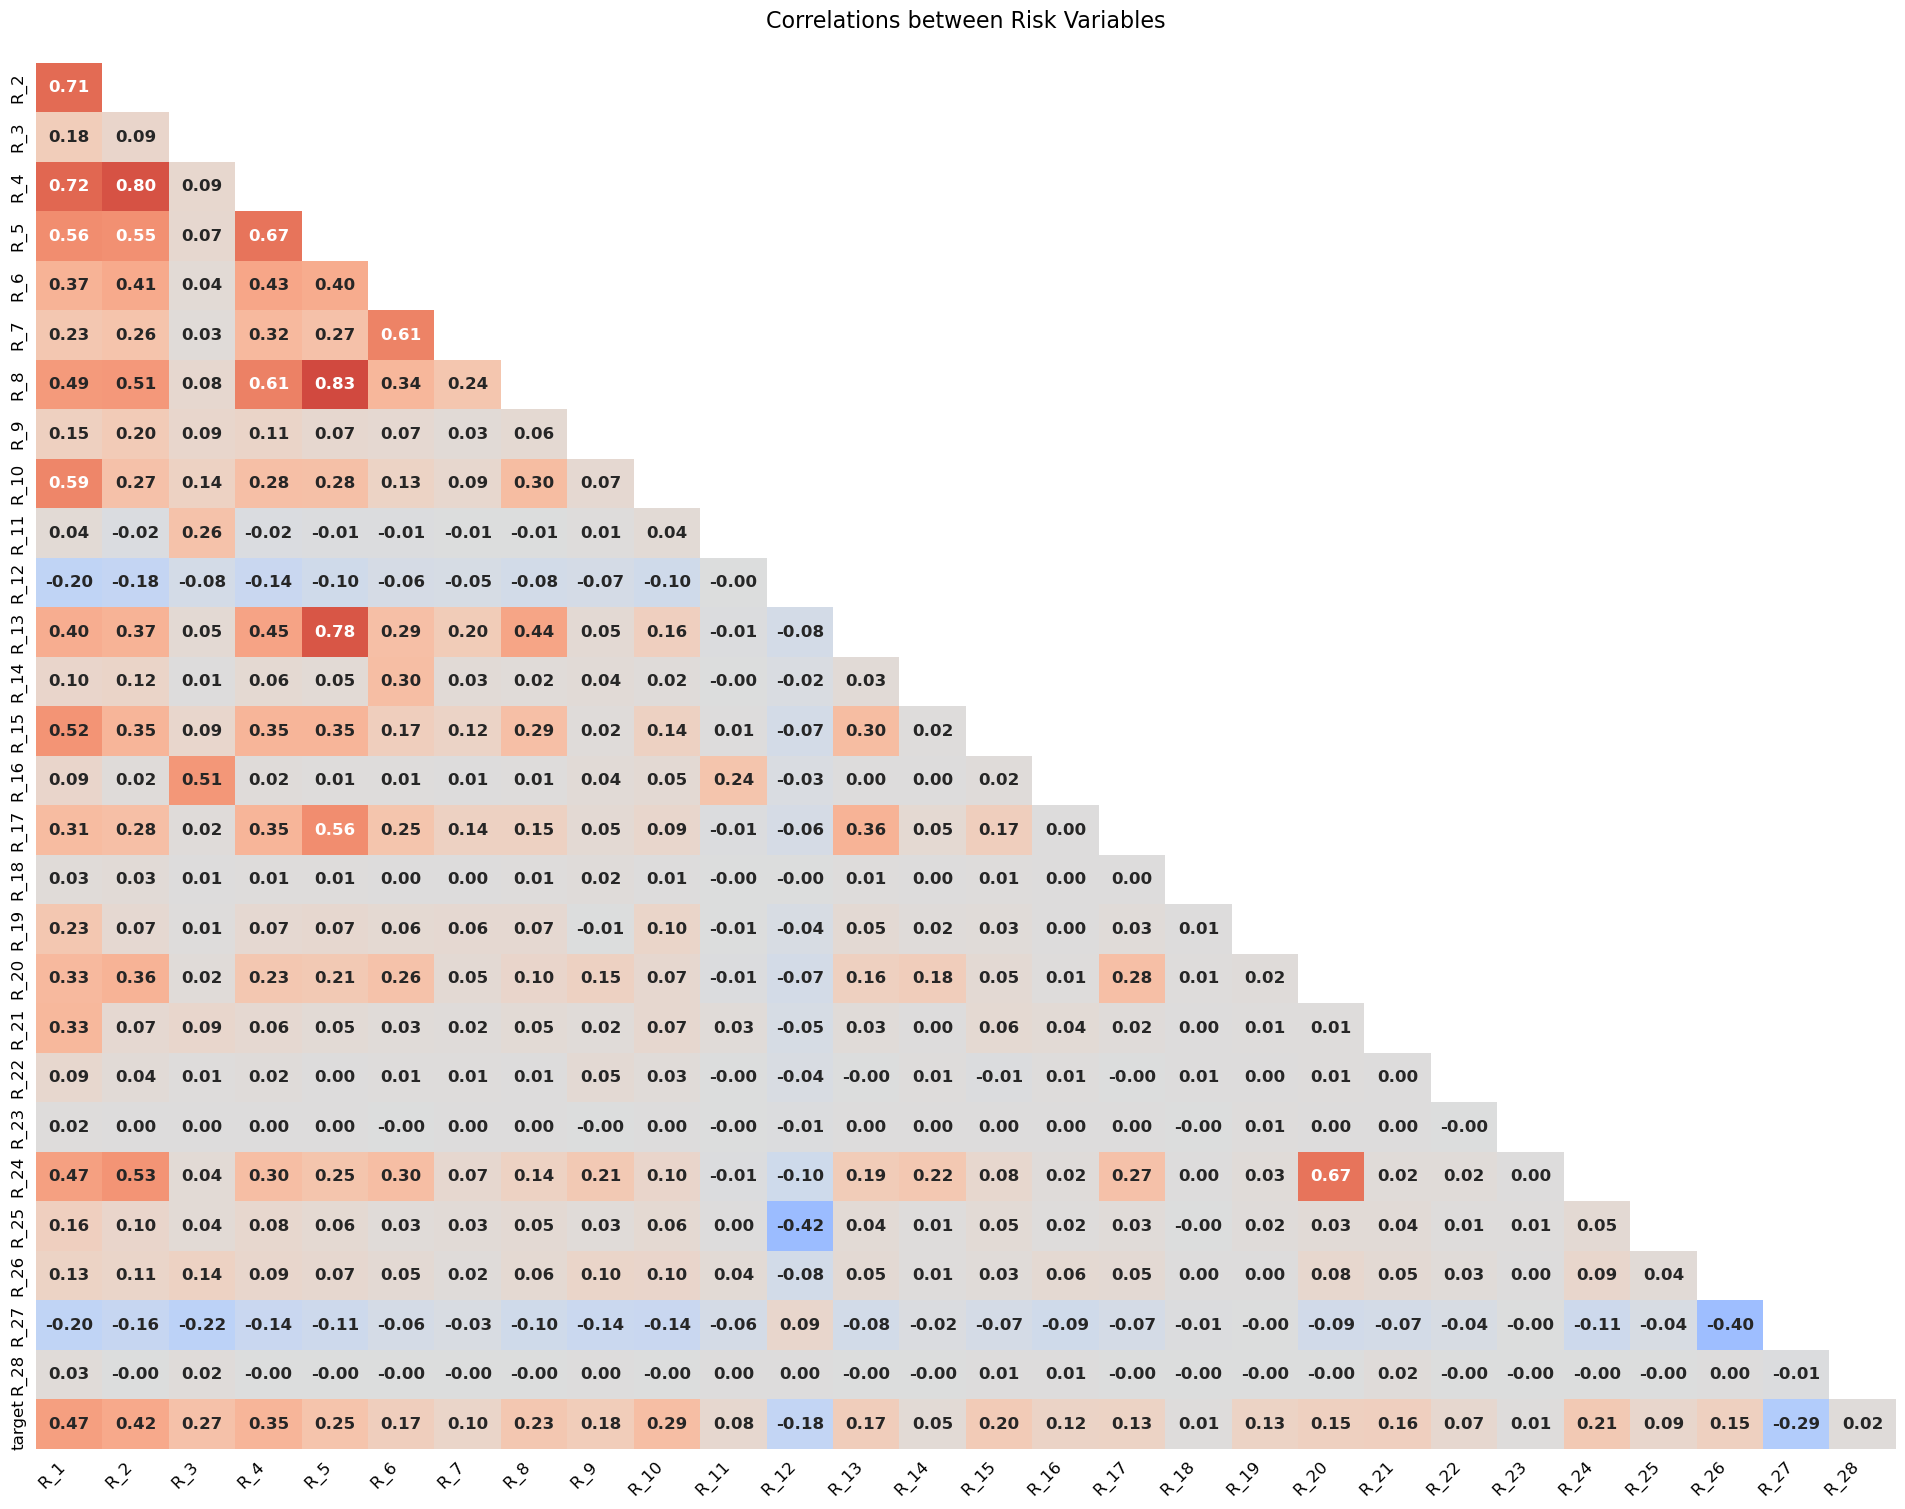

In [55]:
corr = plot_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr = corr.iloc[1:, :-1].copy()
fig, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(
    corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"fontsize": 12, "fontweight": "bold"},
    cbar=False,
)
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=12
)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title("Correlations between Risk Variables\n", fontsize=16)
fig.show()

### EDA of Categorial Features


In [59]:
# Total de features
len(cat_cols)

11

In [76]:
fig= make_subplots(rows=4, cols=3, subplot_titles=cat_cols[:-1], vertical_spacing=0.1)
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))
row=0
c=[1,2,3]*5
pal, color=['#016CC9','#DEB078'], ['#8DBAE2','#EDD3B3']

rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

plot_df=train[cat_cols]
for i,col in enumerate(cat_cols[:-1]):
    if i%3==0:
        row+=1
    plot_df[col]=plot_df[col].astype(object)
    df=plot_df.groupby(col)['target'].value_counts().rename('count').reset_index().replace('',np.nan)
    
    fig.add_trace(go.Bar(x=df[df.target==1][col], y=df[df.target==1]['count'],
                         marker_color=rgb[1], marker_line=dict(color=pal[1],width=2), 
                         hovertemplate='Value %{x} Frequency = %{y}',
                         name='Default', showlegend=(True if i==0 else False)),
                  row=row, col=c[i])
    fig.add_trace(go.Bar(x=df[df.target==0][col], y=df[df.target==0]['count'],
                         marker_color=rgb[0], marker_line=dict(color=pal[0],width=2),
                         hovertemplate='Value %{x} Frequency = %{y}',
                         name='Paid', showlegend=(True if i==0 else False)),
                  row=row, col=c[i])
    if i%3==0:
        fig.update_yaxes(title='Frequency',row=row,col=c[i])
fig.update_layout(template=temp,title="Distribution of Categorical Variables",
                  legend=dict(orientation="h",yanchor="bottom",y=1.03,xanchor="right",x=0.2),
                  barmode='group',height=1500,width=900)
fig.show();

## Correlation between variables

- Use the information between correlation with target variables to better choose features.
- Initially create a list of variables that have high correlation


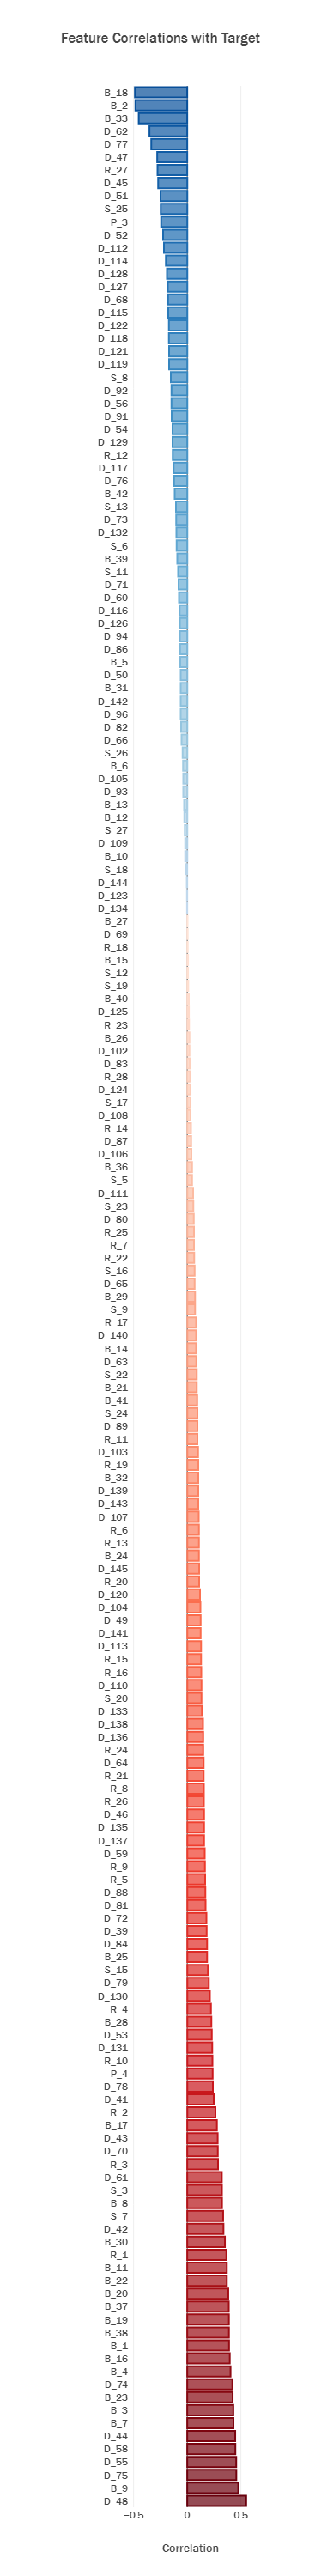

In [ ]:
# I will try to do a different lib for this one
# Based on a example I've saw on the web

import plotly.express as px
import plotly.graph_objects as go

temp = dict(
    layout=go.Layout(
        font=dict(family="Franklin Gothic", size=12), height=500, width=1000
    )
)


corr = train.corr()

corr = corr["target"].sort_values(ascending=False)[1:-1]

pal = sns.color_palette("Reds_r", 135).as_hex()
rgb = ["rgba" + str(matplotlib.colors.to_rgba(i, 0.7)) for i in pal]

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=corr[corr >= 0],
        y=corr[corr >= 0].index,
        marker_color=rgb,
        orientation="h",
        marker_line=dict(color=pal, width=2),
        showlegend=False,
    )
)

pal = sns.color_palette("Blues", 100).as_hex()

rgb = ["rgba" + str(matplotlib.colors.to_rgba(i, 0.7)) for i in pal]


fig.add_trace(
    go.Bar(
        x=corr[corr <= 0],
        y=corr[corr <= 0].index,
        marker_color=rgb[25:],
        orientation="h",
        marker_line=dict(color=pal[25:], width=2),
        showlegend=False,
    )
)

fig.update_layout(
    template=temp,
    title="Feature Correlations with Target",
    xaxis_title="Correlation",
    margin=dict(l=150),
    height=3000,
    width=700,
    hovermode="closest",
)
fig.show()